<a href="https://colab.research.google.com/github/Hanchaeeun/HanChaeEun/blob/main/05_Seasonal_test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [4]:
plt.rc('font', family='NanumBarunGothic') #set font
plt.rc('axes', unicode_minus=False)

# Load

In [5]:
df =pd.read_csv('/content/gdrive/MyDrive/tmp_data/TestData.csv')
print(df.shape)
df

(61343, 20)


,일자,시간,태양광,기온,강수량,풍속,풍향,습도,해면기압,일조,일사,전운량,시정,남중고도,PM10,월,태양광편차,기온편차,일조편차,일사편차
0,2013-01-01,1,0.0,-2.2,NaN,3.7,160.0,95.0,1021.3,NaN,NaN,NaN,NaN,77.254281,44.0,1,0.0,-2.841935,NaN,NaN
1,2013-01-01,2,0.0,-2.4,NaN,3.6,160.0,95.0,1021.2,NaN,NaN,NaN,NaN,68.558811,34.0,1,0.0,-2.895853,NaN,NaN
2,2013-01-01,3,0.0,-2.7,NaN,3.6,160.0,95.0,1020.8,NaN,NaN,7.0,1800.0,56.934467,41.0,1,0.0,-3.074654,NaN,NaN
3,2013-01-01,4,0.0,-2.9,NaN,4.0,160.0,94.0,1020.0,NaN,NaN,7.0,1800.0,44.702936,41.0,1,0.0,-3.142396,NaN,NaN
4,2013-01-01,5,0.0,-2.4,NaN,3.0,160.0,91.0,1019.3,NaN,NaN,10.0,1200.0,32.419081,35.0,1,0.0,-2.431336,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61338,2019-12-31,20,0.0,-2.8,NaN,4.6,20.0,65.0,1033.9,NaN,NaN,7.0,2000.0,29.383611,13.0,12,0.0,-6.962673,NaN,NaN
61339,2019-12-31,21,0.0,-2.8,NaN,3.3,20.0,65.0,1033.9,NaN,NaN,9.0,2000.0,41.632719,17.0,12,0.0,-6.664977,NaN,NaN
61340,2019-12-31,22,0.0,-2.6,NaN,4.7,20.0,63.0,1033.5,NaN,NaN,9.0,2000.0,53.907639,13.0,12,0.0,-6.221659,NaN,NaN
61341,2019-12-31,23,0.0,-2.4,NaN,3.8,20.0,62.0,1033.4,NaN,NaN,8.0,2000.0,65.784728,8.0,12,0.0,-5.850230,NaN,NaN


In [6]:
df.columns

Index(['일자', '시간', '태양광', '기온', '강수량', '풍속', '풍향', '습도', '해면기압', '일조', '일사',
       '전운량', '시정', '남중고도', 'PM10', '월', '태양광편차', '기온편차', '일조편차', '일사편차'],
      dtype='object')

# Seasonal split

In [7]:
day_list = df['일자'].unique()
day_list 

array(['2013-01-01', '2013-01-02', '2013-01-03', ..., '2019-12-29',
       '2019-12-30', '2019-12-31'], dtype=object)

In [8]:
def monthly_plot(df, col, name):
  data = pd.DataFrame()
  for day in day_list:
    data_sum = df[df['일자'] == day][col].sum()
    sum_df = pd.DataFrame([[day, data_sum]], columns=['일자',f'{col}합계'])
    data = pd.concat([data, sum_df]).reset_index(drop=True)

  data['월'] = data['일자'].str[5:7]
  data['월'] = data['월'].astype(int)

  #월별 sum 자료
  for i in range(1,13):
    date = datetime(year = 2013, month = i, day = 1)
    month = date.strftime('%b')
    globals()[month] = data[data['월'].isin([i])][f'{col}합계'].to_numpy(int)

  fig, ax = plt.subplots(1, 1, figsize=(12, 6), constrained_layout=True)
  m_list = np.array([Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec], dtype=object)

  ax.boxplot(m_list, showmeans=True)
  ax.set_xticks(range(1,13))
  ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=16)
  ax.set_title(f"Monthly {name}", loc='center', fontsize=20, pad=15)
  ax.set_xlabel('month', fontsize=16)
  plt.show()

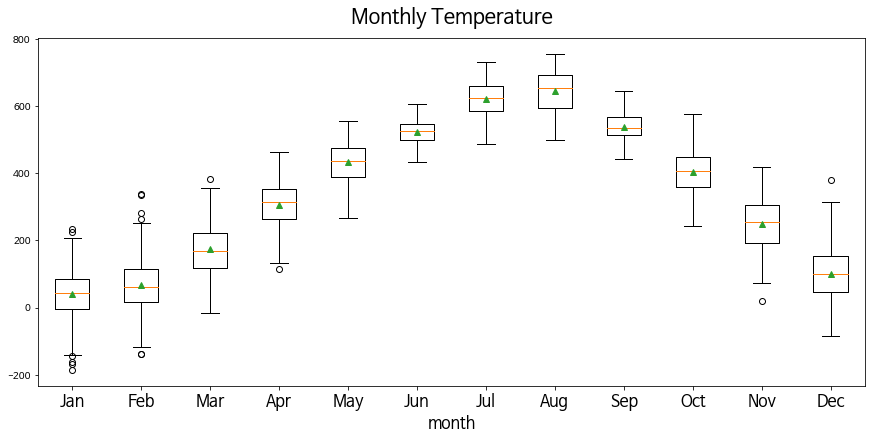

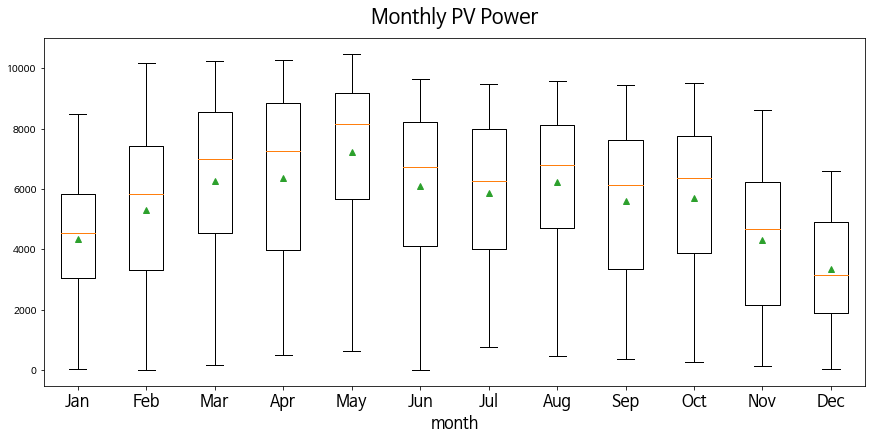

In [9]:
monthly_plot(df, '기온', 'Temperature')
monthly_plot(df,'태양광', 'PV Power')

In [10]:
def drop_idx(df):
  idx = df[df['태양광'] == 0].index
  df.drop(idx, inplace=True)
  df.dropna(subset=['태양광'], inplace=True)
  df.reset_index(inplace=True, drop=True)
  return df

In [11]:
drop_idx(df)

,일자,시간,태양광,기온,강수량,풍속,풍향,습도,해면기압,일조,일사,전운량,시정,남중고도,PM10,월,태양광편차,기온편차,일조편차,일사편차
0,2013-01-01,9,20.16,2.6,0.0,6.0,290.0,91.0,1019.6,0.0,0.03,10.0,1300.0,12.470572,43.0,1,-23.251797,2.264977,-0.279167,-0.167824
1,2013-01-01,10,106.80,4.2,NaN,5.8,250.0,82.0,1019.9,0.7,0.57,7.0,1300.0,21.110853,56.0,1,-136.436129,2.642857,0.151675,-0.015093
2,2013-01-01,11,469.56,3.8,NaN,7.1,320.0,80.0,1020.5,0.7,1.00,9.0,1300.0,27.690225,75.0,1,-51.956682,1.121198,0.061058,0.041843
3,2013-01-01,12,504.24,4.9,0.1,2.8,290.0,73.0,1020.1,0.7,1.05,7.0,1300.0,31.491442,84.0,1,-241.906728,1.347465,0.020874,-0.179539
4,2013-01-01,13,745.20,5.2,NaN,6.7,320.0,66.0,1019.7,0.8,1.14,6.0,1100.0,31.957150,78.0,1,-79.743041,1.005530,0.106311,-0.210046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31292,2019-12-31,14,1148.52,-1.5,NaN,9.1,360.0,59.0,1033.5,0.5,1.04,7.0,2000.0,28.822939,24.0,12,491.745069,-8.193088,-0.076585,-0.062857
31293,2019-12-31,15,830.88,-1.5,NaN,9.9,360.0,55.0,1033.6,0.9,1.43,6.0,2000.0,22.893481,21.0,12,426.633180,-8.189401,0.351691,0.553825
31294,2019-12-31,16,550.92,-1.7,NaN,8.9,360.0,60.0,1034.0,0.8,0.86,7.0,2000.0,14.724322,20.0,12,304.009217,-8.013825,0.302392,0.301843
31295,2019-12-31,17,74.28,-1.9,NaN,8.8,360.0,61.0,1034.3,0.8,0.39,6.0,2000.0,4.975967,22.0,12,22.025253,-7.590783,0.455238,0.172258


In [20]:
hot_season = pd.DataFrame()
for i in range(5,11):
  idx = df[df['월'] == i].index
  data = df.loc[idx]
  hot_season = pd.concat([hot_season,data])
hot_season.reset_index(drop=True, inplace=True)
hot_season

,일자,시간,태양광,기온,강수량,풍속,풍향,습도,해면기압,일조,일사,전운량,시정,남중고도,PM10,월,태양광편차,기온편차,일조편차,일사편차
0,2013-05-01,7,73.32,9.1,NaN,2.3,320.0,94.0,1009.9,0.3,0.22,0.0,900.0,14.246775,36.0,5,15.658065,-6.001843,0.032258,-0.009447
1,2013-05-01,8,211.92,9.8,NaN,2.6,290.0,88.0,1011.0,0.4,0.68,7.0,1200.0,26.520814,49.0,5,-3.828940,-6.558986,-0.127189,0.023825
2,2013-05-01,9,613.80,10.5,NaN,2.5,290.0,85.0,1011.6,0.5,1.11,3.0,1500.0,38.799117,41.0,5,165.358341,-7.293548,-0.142857,-0.096083
3,2013-05-01,10,895.92,11.9,NaN,1.7,290.0,79.0,1011.5,1.0,2.16,0.0,1500.0,50.718272,33.0,5,243.388756,-7.312442,0.295392,0.438433
4,2013-05-01,11,1084.08,13.2,NaN,2.7,250.0,75.0,1012.0,1.0,2.64,0.0,1500.0,61.502172,57.0,5,269.037788,-7.190783,0.265438,0.502258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16974,2019-10-31,14,1121.64,19.5,NaN,3.6,290.0,54.0,1020.9,1.0,2.28,0.0,1700.0,35.518075,31.0,10,320.351521,-0.894470,0.304608,0.606774
16975,2019-10-31,15,967.68,19.7,NaN,4.0,320.0,53.0,1020.8,1.0,1.87,1.0,1934.0,27.878531,56.0,10,280.542120,-0.589862,0.330415,0.492028
16976,2019-10-31,16,703.56,19.4,NaN,4.0,340.0,59.0,1021.1,1.0,1.22,1.0,1860.0,18.237642,81.0,10,191.835392,-0.560369,0.349770,0.229677
16977,2019-10-31,17,269.16,18.4,NaN,3.8,340.0,67.0,1021.4,1.0,0.57,0.0,1375.0,7.329575,92.0,10,-7.369770,-0.752995,0.394009,0.029816


In [21]:
cold_season = pd.DataFrame()
for i in [1,2,3,4,11,12]:
  idx = df[df['월'] == i].index
  data = df.loc[idx]
  cold_season = pd.concat([cold_season,data])
cold_season

,일자,시간,태양광,기온,강수량,풍속,풍향,습도,해면기압,일조,일사,전운량,시정,남중고도,PM10,월,태양광편차,기온편차,일조편차,일사편차
0,2013-01-01,9,20.16,2.6,0.0,6.0,290.0,91.0,1019.6,0.0,0.03,10.0,1300.0,12.470572,43.0,1,-23.251797,2.264977,-0.279167,-0.167824
1,2013-01-01,10,106.80,4.2,NaN,5.8,250.0,82.0,1019.9,0.7,0.57,7.0,1300.0,21.110853,56.0,1,-136.436129,2.642857,0.151675,-0.015093
2,2013-01-01,11,469.56,3.8,NaN,7.1,320.0,80.0,1020.5,0.7,1.00,9.0,1300.0,27.690225,75.0,1,-51.956682,1.121198,0.061058,0.041843
3,2013-01-01,12,504.24,4.9,0.1,2.8,290.0,73.0,1020.1,0.7,1.05,7.0,1300.0,31.491442,84.0,1,-241.906728,1.347465,0.020874,-0.179539
4,2013-01-01,13,745.20,5.2,NaN,6.7,320.0,66.0,1019.7,0.8,1.14,6.0,1100.0,31.957150,78.0,1,-79.743041,1.005530,0.106311,-0.210046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31292,2019-12-31,14,1148.52,-1.5,NaN,9.1,360.0,59.0,1033.5,0.5,1.04,7.0,2000.0,28.822939,24.0,12,491.745069,-8.193088,-0.076585,-0.062857
31293,2019-12-31,15,830.88,-1.5,NaN,9.9,360.0,55.0,1033.6,0.9,1.43,6.0,2000.0,22.893481,21.0,12,426.633180,-8.189401,0.351691,0.553825
31294,2019-12-31,16,550.92,-1.7,NaN,8.9,360.0,60.0,1034.0,0.8,0.86,7.0,2000.0,14.724322,20.0,12,304.009217,-8.013825,0.302392,0.301843
31295,2019-12-31,17,74.28,-1.9,NaN,8.8,360.0,61.0,1034.3,0.8,0.39,6.0,2000.0,4.975967,22.0,12,22.025253,-7.590783,0.455238,0.172258


# Correlation analysis

In [28]:
def correlation(df, cols, name):
  fig, ax = plt.subplots(figsize=(15,8))
  plt.title(f'{name} correlation',pad = 15, fontsize=18)
  
  data = df.copy()
  data = data[cols]

  corr_df = data.corr()
  mask = np.zeros_like(corr_df, dtype=bool)
  mask[np.triu_indices_from(mask)] = True

  sns.heatmap(corr_df, 
            cmap = 'RdBu_r', 
            annot = True,   
            mask = mask,
            linewidths = .5,
            cbar_kws = {"shrink": .8}, 
            vmin = -1,
            vmax = 1
             )  
  plt.show()

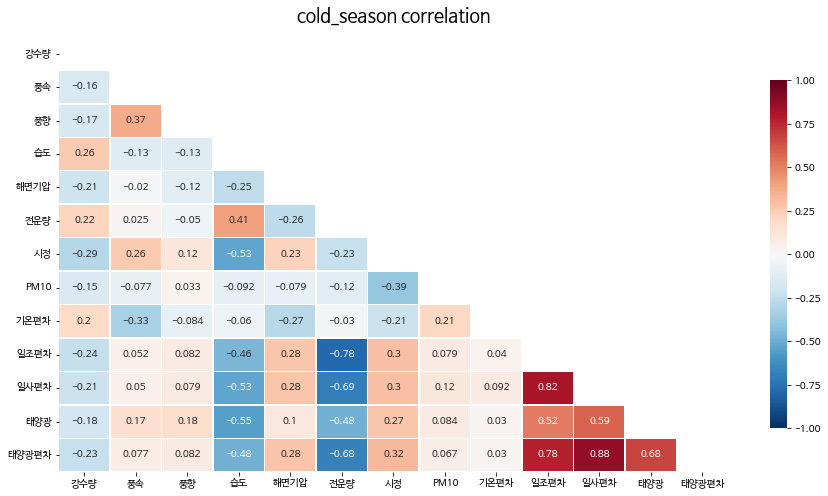

In [29]:
cols = ['강수량', '풍속', '풍향', '습도', '해면기압', '전운량', '시정', 'PM10','기온편차', '일조편차','일사편차', '태양광', '태양광편차']
correlation(cold_season, cols, 'cold_season')

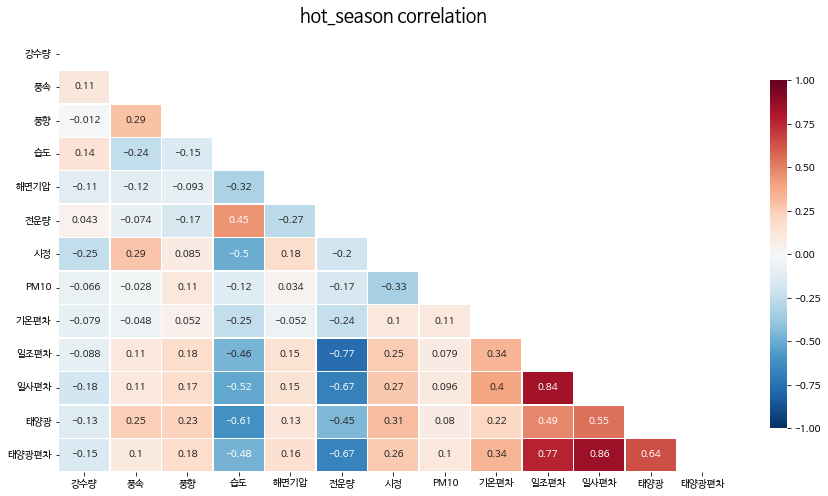

In [31]:
correlation(hot_season, cols, 'hot_season')

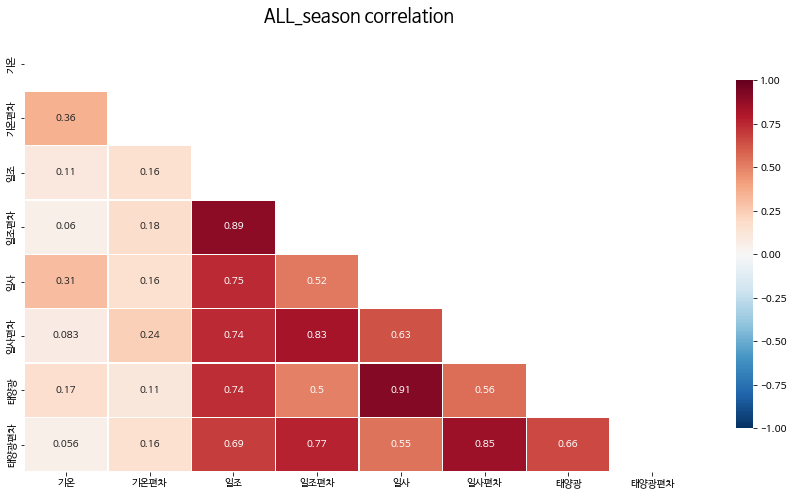

In [33]:
cols = ['기온','기온편차', '일조', '일조편차', '일사', '일사편차','태양광', '태양광편차']
correlation(df, cols, 'ALL_season')